# Image Classification

In [12]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import skimage
%matplotlib inline
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from skimage.io import imread
from skimage.transform import resize

### Load images

In [13]:
def load_images_files(container_path, dimension=(64, 64)):
    image_dir = Path(container_path)
    files =  [individual_jpg for individual_jpg in image_dir.iterdir() if individual_jpg.is_file()]
    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    categories = ['dalmatian','dollar_bill','pizza','soccer_ball','sunflower']
    for file in files:
        img = skimage.io.imread(file)
        img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
        temp  = img_resized.flatten()
        flat_data.append(temp) 
        images.append(img_resized)
        temp = file.stem[:-2]
        if temp == 'dalmatian':
            target.append(0)
        elif temp == 'dollar_bill':
            target.append(1)
        elif temp == 'pizza':
            target.append(2)
        elif temp == 'soccer_ball':
            target.append(3)
        else:
            target.append(4)
            
            
    
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)        
        

In [14]:
image_dataset = load_images_files("images_scrambled/")

# Clustering doesn't Work

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(image_dataset.data)

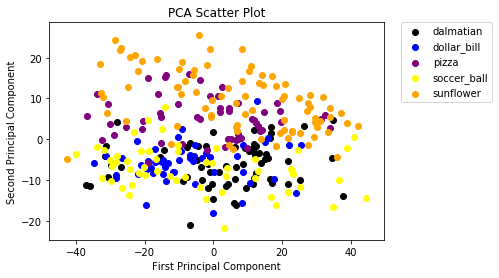

In [16]:
colors = ['black', 'blue', 'purple', 'yellow', 'orange']
for i in range(len(colors)):
    x = reduced_data_pca[:, 0][image_dataset.target== i]
    y = reduced_data_pca[:, 1][image_dataset.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(image_dataset.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

### Split data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

In [9]:
X_train.shape

(216, 12288)

### Training

In [18]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

/home/sreekar/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/sreekar/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Predicting

In [19]:
y_pred = clf.predict(X_test)

In [20]:
import shutil
def partition_folders(y_pred,X_test):
    if Path('./images').exists():
        shutil.rmtree('./images')
    image_dir = Path('./images')
    image_dir.mkdir(parents=True,exist_ok=True)
    temp  = X_test
    categories = ['./images/dalmatian','./images/dollar_bill','./images/pizza','./images/soccer_ball','./images/sunflower']
    root = ['dalmatian','dollar_bill','pizza','soccer_ball','sunflower']
    for folders in categories:
        Path(folders).mkdir(parents=True,exist_ok=True)
    var = [0]*5    
    for i in range(len(y_pred)):
        path = Path(categories[y_pred[i]]+'/'+root[y_pred[i]]+str(var[y_pred[i]])+'.jpeg')
        skimage.io.imsave(str(path),temp[i].reshape((64,64,3)))
        var[y_pred[i]]=var[y_pred[i]]+1
        
        
        
        
    
    

In [21]:
partition_folders(y_pred,X_test)

/home/sreekar/miniconda3/envs/test/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [22]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        16
           1       0.71      0.75      0.73        16
           2       0.75      0.82      0.78        11
           3       0.71      0.67      0.69        18
           4       0.87      0.84      0.86        32

   micro avg       0.76      0.76      0